# Bonds Analysis for Domestic Violence Cases

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Add county and dv and plot by offense description

In [52]:
data_chunks = pd.read_csv(
    "/Users/preetkhowaja/Desktop/qsides/10_cleaned_data/case_offense_desc.csv.zip",
    chunksize=100000,
    index_col=[0],
    usecols=[
        "case_id",
        "disposition",
        "def_zip_address",
        "race",
        "sex",
        "bond_type",
        "bond_amount",
        "domestic_violence",
        "charged_offense_code",
        "domestic_violence_flag",
        "prior_record_points",
        "Offense Description",
    ],
)


In [ ]:
chunk_list = []

for chunk in data_chunks:
    chunk_list.append(chunk)

full_data = pd.concat(chunk_list)

In [54]:
full_data.head()

,def_zip_address,race,sex,bond_type,bond_amount,domestic_violence,charged_offense_code,disposition,domestic_violence_flag,prior_record_points,Offense Description
case_id,,,,,,,,,,,
1973006239,27253,W,M,SEC,10000.0,NaN,3599,SI,N,NaN,DANGEROUS DRUGS - FREE TEXT
1973006239,27253,W,M,SEC,10000.0,NaN,3599,VD,N,NaN,DANGEROUS DRUGS - FREE TEXT
1973007828,27253,W,M,SEC,1.0,NaN,3599,SI,N,NaN,DANGEROUS DRUGS - FREE TEXT
1973007828,27253,W,M,SEC,1.0,NaN,3599,VD,N,NaN,DANGEROUS DRUGS - FREE TEXT
1973013840,27253,W,M,SEC,3000.0,NaN,3599,SI,N,NaN,DANGEROUS DRUGS - FREE TEXT


In [5]:
full_data.columns

Index(['case_id', 'key_county_num', 'key_century', 'key_year', 'court_type',
       'def_street_address', 'def_city_address', 'def_state_address',
       'def_zip_address', 'def_ext_zip_address', 'race', 'sex',
       'process_served', 'case_creation_date', 'process_service_date',
       'case_trial_date', 'court_attorney_type', 'indictment_date',
       'bond_type', 'bond_amount', 'arrest_date', 'domestic_violence',
       'race_gender', 'CRRKEY', 'charged_offense_date', 'charged_offense_code',
       'arraigned_offense_date', 'convicted_offense_code', 'plea_code',
       'verdict_code', 'disposition', 'disposition_date', 'judge_code',
       'min_sentence', 'max_sentence', 'min_sentence_frame', 'fines',
       'restitution', 'probation_len', 'probation_frame',
       'supervised_probation_flag', 'date to paid', 'monies_paid_flag',
       'more_offense_check_flag', 'max_sentence_frame',
       'domestic_violence_flag', 'active_sentence_ind', 'community_service_hr',
       'offense_cla

In [55]:
## Here we look at how many cases are DV cases
full_data.domestic_violence_flag.value_counts()

N    5980629
Y     142592
Name: domestic_violence_flag, dtype: int64

In [60]:
## How many cases are DV cases in the Domestic Violence District Court
full_data[full_data.domestic_violence == 'Y'].domestic_violence_flag.value_counts()

N    89628
Y    63690
Name: domestic_violence_flag, dtype: int64

In most non-domestic violence cases, your conditions of pre-trial release will be set by a magistrate when you are arrested and taken to jail. In those cases, you may be released on a written promise to appear, an unsecured bond, or a secured bond.

The first two types of bonds don’t require you to pay any money to get out. The third type, a secured bond, requires you pay money to get out. You can pay out of pocket or use a bondsman to post the secured bond amount.

However, in domestic violence cases, the laws of North Carolina require pre-trial release conditions to be set by a district court judge. This means a magistrate cannot set your bond when you get to the jail.

In [56]:
## Let's investigate bonds in domestic violence cases only
dv_cases = full_data.loc[full_data['domestic_violence_flag'] == 'Y']
dv_cases.shape

(142592, 11)

# Investigating DV Cases 

In [61]:
## Checking the race distribution in DV cases
dv_cases.race.value_counts(normalize=True)

B    0.465873
W    0.459385
H    0.036407
I    0.016566
U    0.009419
O    0.009356
A    0.002995
Name: race, dtype: float64

Reasonable distribution of B and W defendants in DV cases. 


In [64]:
## How many missing fields for bond amount and type
print(f"{dv_cases.bond_amount.isna().sum()} missing values for Bond Amount")
print(f"{dv_cases.bond_type.isna().sum()} missing values for Bond Type")

40459 missing values for Bond Amount
34612 missing values for Bond Type


In [87]:
## I want to find out why these are missing. Let's look at their disposition
missing_info = dv_cases[(dv_cases.bond_amount.isna()) & (dv_cases.bond_type.isna())]

In [88]:
missing_info.disposition.value_counts()

JU    32399
JR      601
WC      183
WM        7
VD        3
MA        2
Name: disposition, dtype: int64

In [89]:
missing_info['Offense Description'].value_counts()

ASSAULT ON A FEMALE               7481
SIMPLE ASSAULT                    6032
DV PROTECTIVE ORDER VIOL (M)      2393
ASSAULT AND BATTERY               1350
OTHER - FREE TEXT                 1274
                                  ... 
EXPLOIT DISABLE/ELDER CAPACITY       1
CONSPIRE TRAFFIC METHAMPHETAMI       1
AID AND ABET ARMED ROBBERY           1
UNLAWFUL OBTAINING CREDIT CARD       1
FINANCIAL CARD FRAUD (M)             1
Name: Offense Description, Length: 360, dtype: int64

<AxesSubplot: >

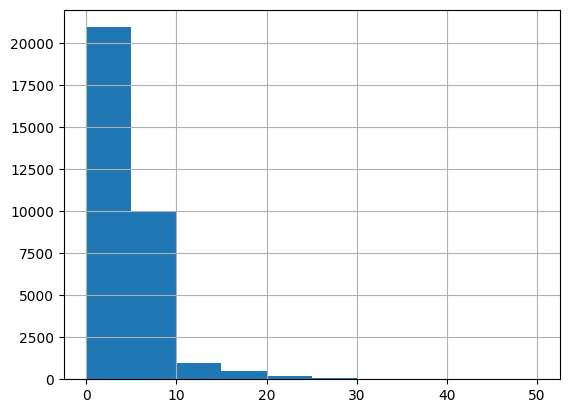

In [93]:
## Most missing cases have minimal prior record points, barring some exceptions
## This could be why no bail was set for these cases
missing_info.prior_record_points.hist(range = [0,50])

The different disposition codes are as follows:

Method of Disposition
- CD - Capacity Dismissed Without Leave
- CV - Change of Venue
- DC - Dismissed by the Court
- DD - Deferred Proceeding or Deferred Prosecution Dismissal

Dismissal
- FE - Fight Extradition
- HC - Habeas Corpus Hearing (superior only)
- JR - Jury                  
- JU - Judge                 
- LC -  Capacity Dismissed with Leave
- MA - Magistrate
- VD - Voluntary Dismissal DA
- WC - Waiver - Clerk
- WD - Withdrawn From Superior Court
- WE - Waiver of Extradition (Code 9901 or 5099 only)
- WM - Waiver - Magistrate
- WP - Waived Probable Cause (Transfer to Superior Court)

(a lot of other codes, see ACIS guide)

Most of our missing bond information is where the case was resolved by judge or jury. This is worth looking into.We need to know what disposition codes mean.

In [68]:
## What is the distribution of race for dismissed cases?
missing_bond_info = dv_cases.loc[(dv_cases.bond_amount.isna()) & (dv_cases.bond_type.isna())]
missing_bond_info.race.value_counts(normalize=True)

W    0.475610
B    0.447925
H    0.035747
I    0.018177
O    0.009970
U    0.009161
A    0.003410
Name: race, dtype: float64

In [73]:
## Are the differences in the proportions significant?
stat_b, pval_b = proportions_ztest([0.465873, 0.447925], [1, 1])
stat_w, pval_w = proportions_ztest([0.459385, 0.475610], [1, 1])
print(stat_b, pval_b)
print(stat_w, pval_w)

0.02547713908785359 0.9796743829330494
-0.02299424930681137 0.9816548601262083


No significant difference in these proportions

In [74]:
dv_cases.shape

(142592, 11)

In [30]:
dv_cases = dv_cases.loc[~dv_cases.bond_amount.isna()]
dv_cases = dv_cases.loc[~dv_cases.bond_type.isna()]

Secured bonds are where you have to pay. For Unsecured and WPA you dont have to pay. How much more likely is a person to get a secured bond vs. a WPA and an unsecured bond because of their race?

In [31]:
dv_cases['charged_offense_code'].value_counts()

1389    25129
1368    14386
3872     6872
1391     5272
1336     3778
        ...  
3454        1
3506        1
3517        1
3432        1
5590        1
Name: charged_offense_code, Length: 508, dtype: int64

In [76]:
## Reducing our dataset to just black, white and hispanic offenders
dv_cases = dv_cases.loc[(dv_cases.race == 'W') | (dv_cases.race == 'B') | (dv_cases.race == 'H')]
dv_cases.race.value_counts(normalize=True)

B    0.484444
W    0.477698
H    0.037858
Name: race, dtype: float64

In [33]:
# Group the data by race and calculate the average bail amount for each group
grouped = dv_cases.groupby("race")
average_bail = grouped["bond_amount"].mean()

# Print the average bail amount for each race
print(average_bail)

race
B    29159.657179
H    51579.140691
W    22441.419059
Name: bond_amount, dtype: float64


In [34]:
# Group the data by race and calculate the average prior record for each group
grouped_prior = dv_cases.groupby("race")
average_priors = grouped_prior["prior_record_points"].mean()

# Print the average bail amount for each race
print(average_priors)

race
B    3.481600
H    1.582485
W    2.871524
Name: prior_record_points, dtype: float64


In [45]:
dv_cases['Offense Description'].value_counts(dropna=False)

ASSAULT ON A FEMALE               25129
SIMPLE ASSAULT                    14386
DV PROTECTIVE ORDER VIOL (M)       6872
ASSAULT GOVT OFFICIAL/EMPLY        5272
ASSAULT AND BATTERY                3778
                                  ...  
CONCEAL HANDGUN PERMIT VIOL(M)        1
FAIL RETURN HIRED MV >$4000           1
INDECENT LIBERTIES STUDENT (F)        1
PWIMSD COCAINE                        1
ALTERING SERIAL NUMBERS               1
Name: Offense Description, Length: 499, dtype: int64

This seems to show that while Black defendants have a higher average bail amount, they also have a higher prior record on average. What is surprising is that Hispanic defendants have a low average prior record but the highest average bail, this could be due to low statistical power and outliers. 

In [77]:
dv_cases[dv_cases['bond_amount'] == 0].shape

(163, 11)

/Users/preetkhowaja/opt/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


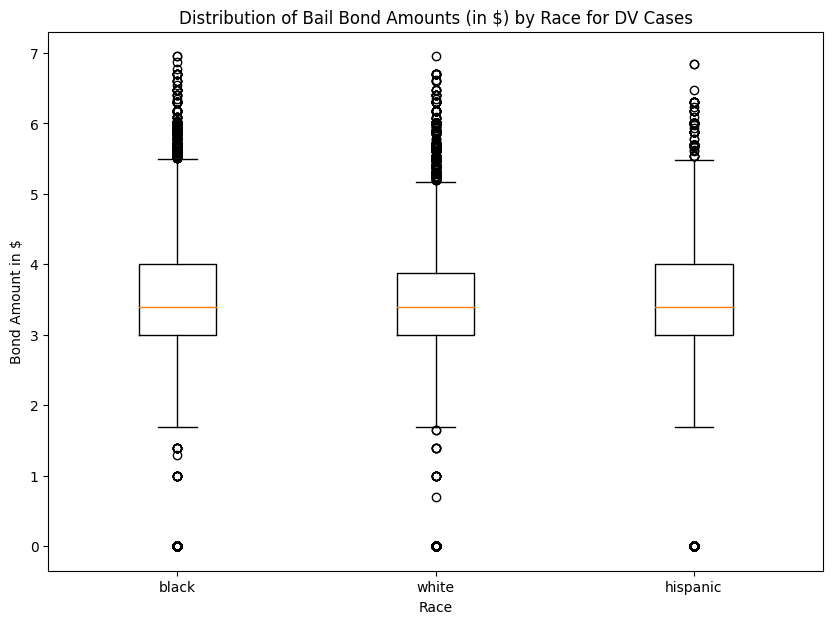

In [42]:
## Looking at median bail amount distribution by race

black_def = np.log10(dv_cases[dv_cases["race"] == "B"]["bond_amount"])
white_def = np.log10(dv_cases[dv_cases["race"] == "W"]["bond_amount"])
hisp_def = np.log10(dv_cases[dv_cases["race"] == "H"]["bond_amount"])


# Add major gridlines in the y-axis
ax.grid(color="grey", axis="y", linestyle="-", linewidth=0.25, alpha=0.5)

# Visualize petal length distribution for all species
fig, ax = plt.subplots(figsize=(10, 7))

# Set plot title
ax.set_title("Distribution of Bail Bond Amounts (in $) by Race for DV Cases")
plt.xlabel("Race")
plt.ylabel("Bond Amount in $")
# Set names as labels for the boxplot
dataset = [
    black_def,
    white_def,
    hisp_def
]
ax.boxplot(
    dataset,
    labels=[
        "black",
        "white",
        "hispanic"
    ],
    showfliers=True,
)

plt.show()


In [78]:
## Creating a cross tab with percentages
race_perc = pd.crosstab(dv_cases.bond_type, dv_cases.race, normalize='columns')
race_perc

race,B,H,W
bond_type,,,
CSH,0.016907,0.052099,0.025223
CUS,0.008444,0.007587,0.009114
PTR,0.001767,0.001265,0.000999
SEC,0.791992,0.772888,0.743878
UNS,0.140380,0.123419,0.169015
WPA,0.040510,0.042742,0.051771


In [79]:
## dividing the dataframe by type of bond

secured_bonds = dv_cases.loc[dv_cases.bond_type == 'SEC']
no_pay_bonds = dv_cases.loc[(dv_cases.bond_type == 'UNS') | (dv_cases.bond_type == 'WPA')]

In [80]:
# Let's limit this analysis to one type of crime, Assault on a female
fem_assault_cases = dv_cases.loc[dv_cases.charged_offense_code == 1389]

In [81]:
fem_assault_cases.race.value_counts(normalize=True)

B    0.505556
W    0.450651
H    0.043793
Name: race, dtype: float64

In [82]:
# Group the data by race and calculate the average bail amount for each group
grouped_fem_as = fem_assault_cases.groupby("race")
average_bail_fem_assault = grouped_fem_as["bond_amount"].mean()

# Print the average bail amount for each race
print(average_bail_fem_assault)

race
B    7918.849184
H    8960.503604
W    7637.435644
Name: bond_amount, dtype: float64


In [83]:
pd.crosstab(fem_assault_cases.bond_type, fem_assault_cases.race, normalize='index')

race,B,H,W
bond_type,,,
CSH,0.363787,0.119601,0.516611
CUS,0.320988,0.012346,0.666667
PTR,0.641026,0.051282,0.307692
SEC,0.522861,0.042861,0.434279
UNS,0.478283,0.039272,0.482445
WPA,0.461911,0.055623,0.482467


In [84]:
from statsmodels.stats.proportion import proportions_ztest


In [38]:
# Conduct Z-test
stat, pval = proportions_ztest([0.505556, 0.522861], [1, 1])

# Print results
print("Test statistic: ", stat)
print("p-value: ", pval)

Test statistic:  -0.024482852962126978
p-value:  0.9804674609700968


In [ ]:
import statsmodels.formula.api as smf

reg_dv = smf.ols(
    "bond_amount ~ C(race) * C(sex) + C(bond_type) + prior_record_points",
    fem_assault_cases,
).fit()
reg_dv.summary()

## Need to add County as a panel OLS in this